In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
def extend(a, b, r):
    x = a - b
    m = (a + b) / 2
    return m - r * x / 2, m + r * x / 2

In [5]:
np.random.seed(0)
N = 20
x = np.empty((4 * N, 2))
means = [(-1, 1), (1, 1), (1, -1), (-1, -1)]
sigmas = [np.eye(2), 2 * np.eye(2), np.diag((1, 2)), np.array(((2, 1), (1, 2)))]
for i in range(4):
    mn = stats.multivariate_normal(means[i], sigmas[i] * 0.3)
    x[i * N:(i + 1) * N, :] = mn.rvs(N)
a = np.array((0, 1, 2, 3)).reshape((-1, 1))
y = np.tile(a, N).flatten()

In [19]:
clf_ovo = svm.SVC(C=1, kernel='rbf', gamma=1, decision_function_shape='ovo')
clf_ovo.fit(x, y)
y_hat = clf_ovo.predict(x)
acc = accuracy_score(y, y_hat)
np.set_printoptions(suppress=True)
print('decision_function_shape: %s, 预测正确的样本个数：%d，正确率：%.2f%%' % (clf_ovo.decision_function_shape, round(acc * 4 * N), 100 * acc))
# decision_function
print(clf_ovo.decision_function(x))
print(y_hat)

decision_function_shape: ovo, 预测正确的样本个数：69，正确率：86.25%
[[ 0.00041835  1.0003916   1.25158694  1.03912429  1.06272462  0.06194409]
 [ 0.73619309  0.99992928  1.00035655  1.01254723  1.0001967  -0.0689392 ]
 [-0.15399317  0.73429473  0.85195011  1.02091686  0.54511927 -0.30394945]
 [ 1.00009974  1.13669234  1.42106961  0.90744317  0.60940832 -0.33678376]
 [ 1.25490693  1.00737616  1.28386426  0.53541648  0.3328939  -0.23111811]
 [ 1.13837756  0.9998946   1.09243513  0.68425394  0.62492466 -0.09376565]
 [ 1.14531542  1.12700656  1.4596147   0.86224637  0.6542139  -0.26387772]
 [ 1.27456468  1.08751578  1.4197428   0.75811727  0.57714971 -0.23383485]
 [ 0.38108911  1.07508655  1.37185691  1.02312927  0.8309466  -0.16605383]
 [ 1.23239766  1.08305017  0.72089554  0.61064721 -0.24941275 -0.81087327]
 [ 0.9999704   0.99997809  1.00016225  0.05183437 -0.03803559 -0.10515298]
 [ 1.00011152  1.09099303  0.99944411  0.83414486  0.10857475 -0.70070868]
 [-0.68417088  0.16098897  0.36409711  0.85982

In [36]:
clf_ovr = svm.SVC(C=1, kernel='linear', decision_function_shape='ovr')
clf_ovr.fit(x, y)
y_hat = clf_ovr.predict(x)
acc = accuracy_score(y, y_hat)
np.set_printoptions(suppress=True)
print('decision_function_shape: %s, 预测正确的样本个数：%d，正确率：%.2f%%' % (clf_ovr.decision_function_shape, round(acc * 4 * N), 100 * acc))
# decision_function
print(clf_ovr.decision_function(x))
print(y_hat)

decision_function_shape: ovr, 预测正确的样本个数：66，正确率：82.50%
[[ 2.09887682  3.09512828 -0.11808989  0.92408478]
 [ 3.21992603  2.12444698 -0.22925992  0.88488691]
 [ 2.02778059  3.05186938 -0.05966688  0.9800169 ]
 [ 3.10483818  2.04013998 -0.13845534  0.99347718]
 [ 3.17453664  1.0132656  -0.21401121  2.02620897]
 [ 3.21529782  2.06038428 -0.24161771  0.96593561]
 [ 3.12571375  2.04129328 -0.15865703  0.99165   ]
 [ 3.14878032  2.03468594 -0.18305871  0.99959245]
 [ 3.08032985  2.0622269  -0.10855285  0.96599611]
 [ 3.09632999  0.98769371 -0.14393664  2.05991294]
 [ 3.28494159  0.9138264  -0.34870045  2.14993246]
 [ 3.07957773  1.01585878 -0.12004909  2.02461258]
 [ 0.98841131  3.05301829  0.97930861  0.97926179]
 [ 3.1394941   0.99907418 -0.18333368  2.0447654 ]
 [ 3.16013808  2.12206083 -0.17116002  0.88896111]
 [ 3.16257008  2.02350794 -0.19955387  1.01347585]
 [ 2.08991392  0.89570153 -0.16190789  3.17629244]
 [ 3.17203072  0.99366444 -0.21672176  2.0510266 ]
 [ 3.15933974  2.09947277 -0

In [23]:
x1_min, x2_min = np.min(x, axis=0)
x1_max, x2_max = np.max(x, axis=0)
x1_min, x1_max = extend(x1_min, x1_max, 1.05)
x2_min, x2_max = extend(x2_min, x2_max, 1.05)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
x_test = np.stack((x1.flat, x2.flat), axis=1)
x_test

array([[ 2.19029073,  2.6296624 ],
       [ 2.19029073,  2.61968018],
       [ 2.19029073,  2.60969796],
       ..., 
       [-3.09018301, -2.33150062],
       [-3.09018301, -2.34148284],
       [-3.09018301, -2.35146506]])

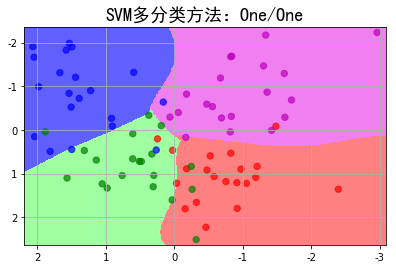

In [30]:
y_test = clf_ovo.predict(x_test)
y_test = y_test.reshape(x1.shape)
cm_light = mpl.colors.ListedColormap(['#FF8080', '#A0FFA0', '#6060FF', '#F080F0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g', 'b', 'm'])
myfont = mpl.font_manager.FontProperties(fname='../fonts/simhei.ttf') #自定义字体
# mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False # 保存图片时'-' 可能为块
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_test, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=cm_dark, alpha=0.7)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(b=True)
plt.tight_layout(pad=2.5)
plt.title(u'SVM多分类方法：One/One', fontsize=18, fontproperties=myfont)
plt.show()

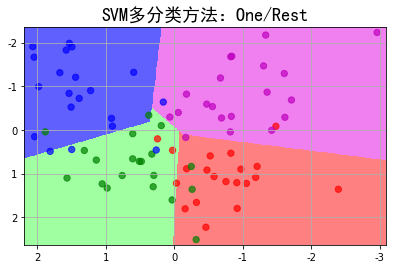

In [37]:
y_test = clf_ovr.predict(x_test)
y_test = y_test.reshape(x1.shape)
cm_light = mpl.colors.ListedColormap(['#FF8080', '#A0FFA0', '#6060FF', '#F080F0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g', 'b', 'm'])
myfont = mpl.font_manager.FontProperties(fname='../fonts/simhei.ttf') #自定义字体
# mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False # 保存图片时'-' 可能为块
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_test, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=cm_dark, alpha=0.7)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(b=True)
plt.tight_layout(pad=2.5)
plt.title(u'SVM多分类方法：One/Rest', fontsize=18, fontproperties=myfont)
plt.show()